## Nível 2: Machine Learning Aplicado

##### 1. Carregamento dos dados

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import json

In [3]:
# Configuração do estilo dos gráficos
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8')

# Carregamento dos dados
df = pd.read_csv('../dataset/sample_superstore.csv', encoding='ISO-8859-1')

# Visualização das primeiras linhas do dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


##### 2. Tratamento e Preparação dos Dados

In [4]:
# Converter 'Order Date' para datetime e extrair ano e mês
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Selecionar features e target
features = ['Quantity', 'Discount', 'Year', 'Month']
target = 'Sales'

# Filtrar o dataset
df_model = df[features + [target]]

# Verificar valores nulos
print("Valores nulos por coluna:")
print(df_model.isnull().sum())

# Verificar estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df_model.describe())

Valores nulos por coluna:
Quantity    0
Discount    0
Year        0
Month       0
Sales       0
dtype: int64

Estatísticas descritivas:
          Quantity     Discount         Year        Month         Sales
count  9994.000000  9994.000000  9994.000000  9994.000000   9994.000000
mean      3.789574     0.156203  2015.722233     7.809686    229.858001
std       2.225110     0.206452     1.123555     3.284654    623.245101
min       1.000000     0.000000  2014.000000     1.000000      0.444000
25%       2.000000     0.000000  2015.000000     5.000000     17.280000
50%       3.000000     0.200000  2016.000000     9.000000     54.490000
75%       5.000000     0.200000  2017.000000    11.000000    209.940000
max      14.000000     0.800000  2017.000000    12.000000  22638.480000


##### 3. Divisão dos Dados em Treino, Validação e Teste

In [5]:
# Primeiro, dividir em treino (60%) e temporário (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    df_model[features], df_model[target], test_size=0.4, random_state=42
)

# Depois, dividir o temporário em validação (20%) e teste (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("\nTamanho dos conjuntos:")
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Validação: {X_val.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")


Tamanho dos conjuntos:
Treino: 5996 amostras
Validação: 1999 amostras
Teste: 1999 amostras


##### 4. Treinamento do Modelo com Ajuste de Hiperparâmetros

In [6]:
# Instanciar o modelo
model = RandomForestRegressor(random_state=42)

# Hiperparâmetros para o GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # Validação cruzada no conjunto de treino
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
# Ajustar o GridSearchCV no conjunto de treino
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros
best_params = grid_search.best_params_
print("\nMelhores hiperparâmetros encontrados:")
print(best_params)

# Treinar o modelo final com os melhores hiperparâmetros no conjunto de treino
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)


Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=300,
                      random_state=42)

##### 5. Avaliação no Conjunto de Validação


Avaliação no Conjunto de Validação:
MSE: 655896.52
RMSE: 809.87
R²: 0.03


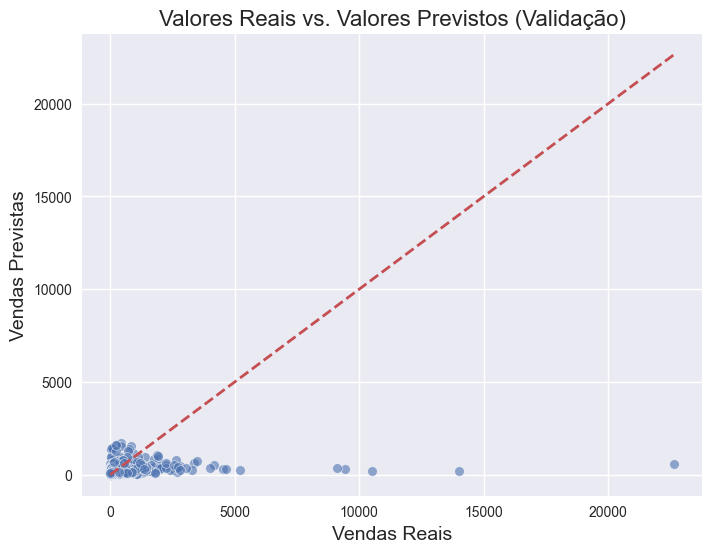

In [9]:
# Previsões no conjunto de validação
y_val_pred = best_model.predict(X_val)

# Métricas de avaliação no conjunto de validação
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

print("\nAvaliação no Conjunto de Validação:")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R²: {r2_val:.2f}")

# Gráfico de dispersão entre valores reais e previstos (validação)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title('Valores Reais vs. Valores Previstos (Validação)', fontsize=16)
plt.xlabel('Vendas Reais', fontsize=14)
plt.ylabel('Vendas Previstas', fontsize=14)
plt.show()

##### 6. Avaliação Final no Conjunto de Teste


Avaliação no Conjunto de Teste:
MSE: 365272.32
RMSE: 604.38
R²: 0.04


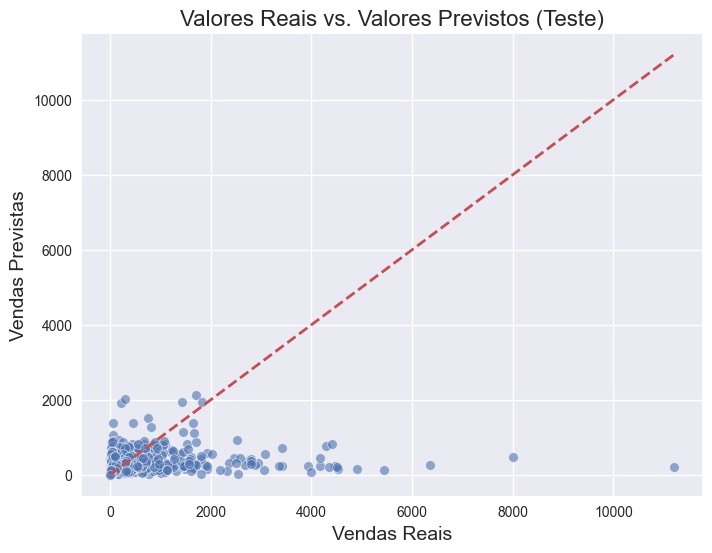

In [ ]:
# Previsões no conjunto de teste
y_test_pred = best_model.predict(X_test)

# Métricas de avaliação no conjunto de teste
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nAvaliação no Conjunto de Teste:")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.2f}")

# Gráfico de dispersão entre valores reais e previstos (teste)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Valores Reais vs. Valores Previstos (Teste)', fontsize=16)
plt.xlabel('Vendas Reais', fontsize=14)
plt.ylabel('Vendas Previstas', fontsize=14)
plt.show()

##### 7. Interpretação do Modelo


Importância das Features:
    Feature  Importance
0  Quantity    0.363777
3     Month    0.252990
1  Discount    0.232629
2      Year    0.150604


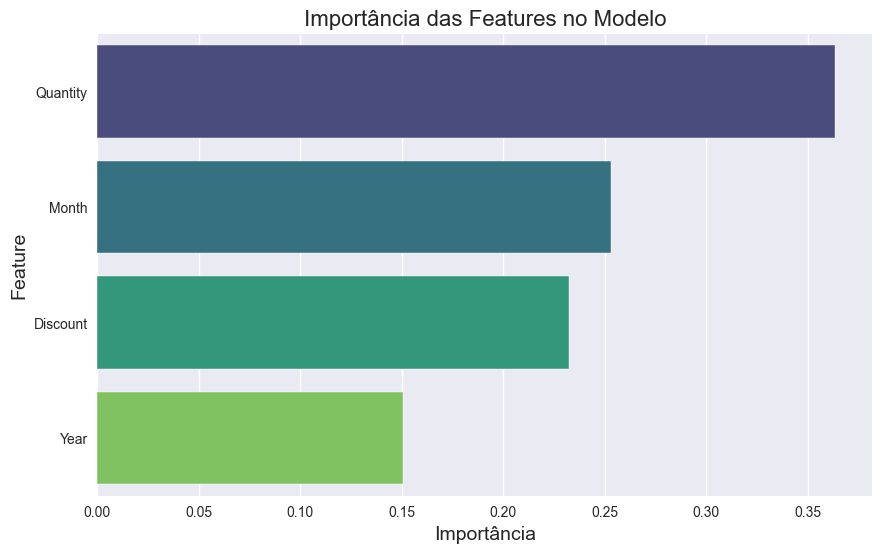

In [15]:
# Importância das features
feature_importance = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nImportância das Features:")
print(feature_importance_df)

# Gráfico de importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, hue='Feature', palette='viridis')
plt.title('Importância das Features no Modelo', fontsize=16)
plt.xlabel('Importância', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

##### 8. Exportação dos Resultados para JSON

In [17]:
# Salvar métricas e importância das features em um dicionário
results = {
    'best_params': best_params,
    'metrics': {
        'validation': {
            'MSE': mse_val,
            'RMSE': rmse_val,
            'R2': r2_val
        },
        'test': {
            'MSE': mse_test,
            'RMSE': rmse_test,
            'R2': r2_test
        }
    },
    'feature_importance': feature_importance_df.to_dict(orient='records')
}
# Exportar para JSON
with open('ml_results.json', 'w') as f:
    json.dump(results, f, indent=4)

print("\nResultados exportados para 'ml_results.json'.")


Resultados exportados para 'ml_results.json'.
